In [26]:
from matplotlib import pyplot as plt
import numpy as np

import json
import os, sys
from os.path import join

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from config import DATA_PATH

plt.rcdefaults() 
%matplotlib inline

INPUT_PATH = join(DATA_PATH, "classifiers/mnist/")
CLASSIFIERS = ["cnn/relu", 
               "cnn/relu/labsmooth", 
               "cnn/relu/featsqueeze1", 
               "cnn/relu/gaussian/stdev0.30/pert-insts10/", 
               "cnn/brelu/gaussian/stdev0.30/pert-insts10/", 
               "cnn/relu/adv-trained/",
               "cnn/relu/adv-trained/vat/eps2.10_train.npy"
              ]  

markers = ['o', '^', 's', 'D', '*', '+', '.']

labels = ['CNN', 'CNN + LS', 'CNN + FS', 'CNN + G RELU', 'CNN + G BRELU', 'CNN + FGSM AT', 'CNN + VAT AT']
accuracies = {}
for c in CLASSIFIERS:
    with open(join(INPUT_PATH, c, "accuracies.json"), "r") as json_file:
        accuracies[c] = json.load(json_file)

Accuracy on white-box attacks with fgsm
cnn/relu
cnn/relu/labsmooth
cnn/relu/featsqueeze1
cnn/relu/gaussian/stdev0.30/pert-insts10/
cnn/brelu/gaussian/stdev0.30/pert-insts10/
cnn/relu/adv-trained/
cnn/relu/adv-trained/vat/eps2.10_train.npy


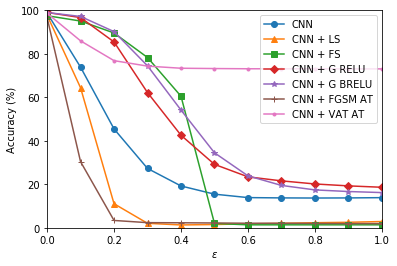

In [27]:
print("Accuracy on white-box attacks with fgsm")
PATH = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/"
%matplotlib inline

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    print(c)
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]
    
    if c.endswith(".npy"):
        d = c[:-4]
    else:
        d = c

    for eps in eps_values:
        train[c].append(accuracies[c][join(PATH, d, "fgsm", "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(PATH, d, "fgsm", "eps%.2f_test.npy" % eps)])

# fig = plt.figure()
# ax = fig.add_subplot(1, 2, 1)
# plt.title("Train Accuracies")

# for c in CLASSIFIERS:
#     plt.plot([0.] + eps_values, train[c], label=c)

# ax.set_xlim([0, 1])
# ax.set_ylim([0, 100])
# plt.legend()

# plt.title("Test Accuracies")

for c, l, m in zip(CLASSIFIERS, labels, markers):

    plt.plot([0.] + eps_values, test[c], label=l, marker=m)
    
plt.xlim([0, 1])
plt.ylim([0, 100])

plt.xlabel("$\epsilon$")
plt.ylabel("Accuracy (%)")

plt.legend()

Accuracy on same architecture attacks


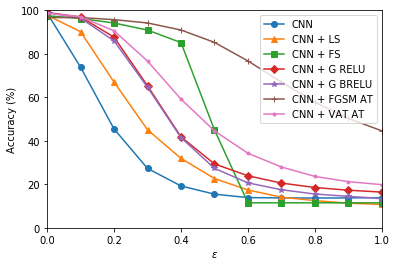

In [28]:
DATASET = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/cnn/relu/fgsm"
print("Accuracy on same architecture attacks")

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]

    for eps in eps_values:
        train[c].append(accuracies[c][join(DATASET, "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(DATASET,"eps%.2f_test.npy" % eps)])

# fig = plt.figure()
# ax = fig.add_subplot(1, 2, 1)
# plt.title("Train Accuracies")

for c, l, m in zip(CLASSIFIERS, labels, markers):

    plt.plot([0.] + eps_values, test[c], label=l, marker=m)
    
plt.xlim([0, 1])
plt.ylim([0, 100])

plt.xlabel("$\epsilon$")
plt.ylabel("Accuracy (%)")

plt.legend()

# ax.set_xlim([0, 1])
# ax.set_ylim([0, 100])
# plt.xlabel("epsilon")
# plt.ylabel("accuracy (%)")
# plt.legend()

# ax = fig.add_subplot(1, 2, 2)
# plt.title("Test Accuracies")

# for c in CLASSIFIERS:
#     plt.plot([0.] + eps_values, test[c], label=c)
    
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 100])
# plt.xlabel("epsilon")
# plt.ylabel("accuracy (%)")
    
# plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
# plt.legend()

Accuracy on black-box attacks on /dccstor/dlw/data/adversarial_learning/adversarial/mnist/resnet/relu/fgsm


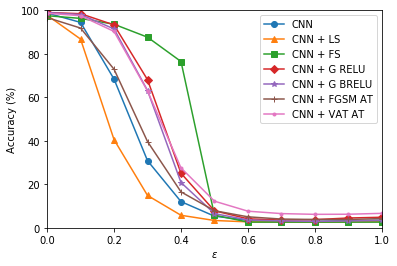

In [29]:
DATASET = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/resnet/relu/fgsm"
print("Accuracy on black-box attacks on", DATASET)

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]

    for eps in eps_values:
        train[c].append(accuracies[c][join(DATASET, "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(DATASET,"eps%.2f_test.npy" % eps)])

# fig = plt.figure()
# ax = fig.add_subplot(1, 2, 1)
# plt.title("Train Accuracies")

# for c in CLASSIFIERS:
#     plt.plot([0.] + eps_values, train[c], label=c)

# ax.set_xlim([0, 1])
# ax.set_ylim([0, 100])
# plt.xlabel("epsilon")
# plt.ylabel("accuracy (%)")
# plt.legend()

# ax = fig.add_subplot(1, 2, 2)
# plt.title("Test Accuracies")

# for c in CLASSIFIERS:
#     plt.plot([0.] + eps_values, test[c], label=c)
    
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 100])
# plt.xlabel("epsilon")
# plt.ylabel("accuracy (%)")
    
# plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
# plt.legend()

for c, l, m in zip(CLASSIFIERS, labels, markers):

    plt.plot([0.] + eps_values, test[c], label=l, marker=m)
    
plt.xlim([0, 1])
plt.ylim([0, 100])

plt.xlabel("$\epsilon$")
plt.ylabel("Accuracy (%)")

plt.legend()

Accuracy on white-box attacks with random + fgsm
cnn/relu
cnn/relu/labsmooth
cnn/relu/featsqueeze1
cnn/relu/gaussian/stdev0.30/pert-insts10/
cnn/brelu/gaussian/stdev0.30/pert-insts10/
cnn/relu/adv-trained/fgsm/eps0.30_train.npy
cnn/relu/adv-trained/vat/eps2.10_train.npy


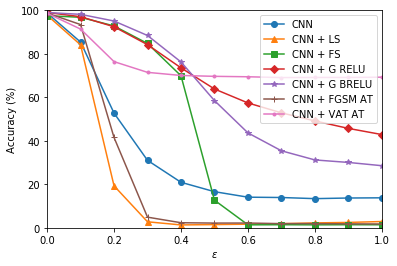

In [30]:
CLASSIFIERS[5] += "fgsm/eps0.30_train.npy"
with open(join(INPUT_PATH, CLASSIFIERS[5], "accuracies.json"), "r") as json_file:
        accuracies[CLASSIFIERS[5]] = json.load(json_file)
print("Accuracy on white-box attacks with random + fgsm")
PATH = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/"
%matplotlib inline

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    print(c)
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]
    
    if c.endswith(".npy"):
        d = c[:-4]
    else:
        d = c

    for eps in eps_values:
        train[c].append(accuracies[c][join(PATH, d, "rnd_fgsm", "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(PATH, d, "rnd_fgsm", "eps%.2f_test.npy" % eps)])

# fig = plt.figure()
# ax = fig.add_subplot(1, 2, 1)
# plt.title("Train Accuracies")

# for c in CLASSIFIERS:
#     plt.plot([0.] + eps_values, train[c], label=c)

# ax.set_xlim([0, 1])
# ax.set_ylim([0, 100])
# plt.legend()

# plt.title("Test Accuracies")

for c, l, m in zip(CLASSIFIERS, labels, markers):

    plt.plot([0.] + eps_values, test[c], label=l, marker=m)
    
plt.xlim([0, 1])
plt.ylim([0, 100])

plt.xlabel("$\epsilon$")
plt.ylabel("Accuracy (%)")

plt.legend()

Accuracy on same architecture attacks
cnn/relu
cnn/relu/labsmooth
cnn/relu/featsqueeze1
cnn/relu/gaussian/stdev0.30/pert-insts10/
cnn/brelu/gaussian/stdev0.30/pert-insts10/
cnn/relu/adv-trained/fgsm/eps0.30_train.npy
cnn/relu/adv-trained/vat/eps2.10_train.npy


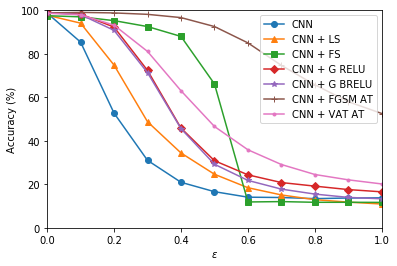

In [31]:
DATASET = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/cnn/relu/rnd_fgsm"
print("Accuracy on same architecture attacks")

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    print(c)
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]

    for eps in eps_values:
        train[c].append(accuracies[c][join(DATASET, "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(DATASET,"eps%.2f_test.npy" % eps)])

for c, l, m in zip(CLASSIFIERS, labels, markers):

    plt.plot([0.] + eps_values, test[c], label=l, marker=m)
    
plt.xlim([0, 1])
plt.ylim([0, 100])

plt.xlabel("$\epsilon$")
plt.ylabel("Accuracy (%)")

plt.legend()

Accuracy black-box attacks


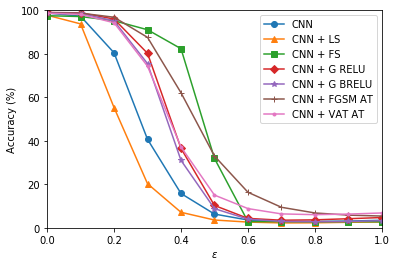

In [32]:
DATASET = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/resnet/relu/rnd_fgsm"
print("Accuracy black-box attacks")

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]

    for eps in eps_values:
        train[c].append(accuracies[c][join(DATASET, "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(DATASET,"eps%.2f_test.npy" % eps)])

for c, l, m in zip(CLASSIFIERS, labels, markers):

    plt.plot([0.] + eps_values, test[c], label=l, marker=m)
    
plt.xlim([0, 1])
plt.ylim([0, 100])

plt.xlabel("$\epsilon$")
plt.ylabel("Accuracy (%)")

plt.legend()